In [18]:
import pandas as pd

# Load the XLSX file
file_path = 'finviz.xlsx'
df = pd.read_excel(file_path)

def convert_market_cap(value):
    if isinstance(value, str):
        if value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
    return value

# Convert Market Cap to numeric values
df['Market Cap'] = df['Market Cap'].apply(convert_market_cap)

def project_gp(current_gp, gpg, years=4, sector_growth=0.03):
    projected_gp = [current_gp]
    for year in range(1, years + 1):
        next_gp = projected_gp[-1] * (1 + gpg + sector_growth)
        projected_gp.append(next_gp)
    return projected_gp

def calculate_eps(current_eps, projected_gp, current_gp):
    return [current_eps * (gp / current_gp) for gp in projected_gp]

def calculate_market_cap(pe_ratio, projected_eps):
    return [pe_ratio * eps for eps in projected_eps]

def adjust_market_cap(market_cap, adjustment):
    return [cap * (1 + adjustment) for cap in market_cap]

# Add new columns for projected market caps
for year in range(1, 5):
    df[f'Projected Market Cap Year {year}'] = 0.0

# Parameters
sector_growth = 0.03
market_conditions_adjustment = 0.05
years = 4

# Process each company in the dataframe
for index, row in df.iterrows():
    try:
        current_gp = row['2023 GP']
        gpg = row['Gross Profit Growth (GPG)']
        pe_ratio = row['P/E']
        eps = row['EPS']
        
        if pd.notna(current_gp) and pd.notna(gpg) and pd.notna(pe_ratio) and pd.notna(eps):
            # Project GP
            projected_gp = project_gp(current_gp, gpg, years, sector_growth)
            
            # Calculate EPS
            projected_eps = calculate_eps(eps, projected_gp, current_gp)
            
            # Calculate market cap
            projected_market_cap = calculate_market_cap(pe_ratio, projected_eps)
            
            # Adjust market cap
            adjusted_market_cap = adjust_market_cap(projected_market_cap, market_conditions_adjustment)
            
            # Store results
            for year in range(1, 5):
                df.at[index, f'Projected Market Cap Year {year}'] = adjusted_market_cap[year]
    except KeyError as e:
        print(f"KeyError: {e} for row index: {index}")

# Display the updated dataframe
print(df.head())

def analyze_valuation(df):
    analysis_results = []
    for index, row in df.iterrows():
        current_market_cap = row['Market Cap']
        projected_market_caps = [row[f'Projected Market Cap Year {year}'] for year in range(1, 5)]
        
        if pd.notna(current_market_cap):
            if current_market_cap < projected_market_caps[-1]:
                valuation = 'Undervalued'
            else:
                valuation = 'Overvalued'
            analysis_results.append((row['Company Name'], valuation, projected_market_caps))
    
    return analysis_results

valuation_analysis = analyze_valuation(df)

# Print analysis results
for result in valuation_analysis:
    print(result)


# Save the updated DataFrame to a new Excel file
output_file_path = 'finviz_update.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Updated file saved as {output_file_path}")


                             Company Name                         SECTOR  \
0               Eton Pharmaceuticals Inc.              HEALTHCARE SECTOR   
1            Collegium Pharmaceutical Inc              HEALTHCARE SECTOR   
2                                Alvotech              HEALTHCARE SECTOR   
3  Qilian International Holding Group Ltd              HEALTHCARE SECTOR   
4             Iridium Communications Inc.  COMMUNICATION SERVICES SECTOR   

     Market Cap     P/E   EPS  Gross Profit (GP)    2023 GP   2022 GP  \
0  8.992000e+07  116.67  0.03           22722.00   21061.00   14318.0   
1  1.060000e+09   13.48  2.51          340223.00  326169.00  209488.0   
2  3.610000e+09     NaN -2.08          -29296.00  -69422.00   18934.0   
3  4.426000e+07     NaN -1.10            1751.49    1751.49    6227.3   
4  3.134000e+09  129.05  0.20          567598.00  565603.00  519885.0   

     2021 GP  Gross Profit Growth (GPG)  Projected Market Cap Year 1  \
0   19005.00                   0

In [16]:
import pandas as pd

# Load the XLSX file
file_path = 'finviz.xlsx'
df = pd.read_excel(file_path)

def convert_market_cap(value):
    if isinstance(value, str):
        if value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
    return value

# Convert Market Cap to numeric values
df['Market Cap'] = df['Market Cap'].apply(convert_market_cap)

def project_gp(current_gp, gpg, years=4, sector_growth=0.03):
    projected_gp = [current_gp]
    for year in range(1, years + 1):
        next_gp = projected_gp[-1] * (1 + gpg + sector_growth)
        projected_gp.append(next_gp)
    return projected_gp

def calculate_eps(current_eps, projected_gp, current_gp):
    return [current_eps * (gp / current_gp) for gp in projected_gp]

def calculate_market_cap(pe_ratio, projected_eps):
    return [pe_ratio * eps for eps in projected_eps]

def adjust_market_cap(market_cap, adjustment):
    return [cap * (1 + adjustment) for cap in market_cap]

# Add new columns for projected market caps
for year in range(1, 5):
    df[f'Projected Market Cap Year {year}'] = 0.0

# Parameters
sector_growth = 0.03
market_conditions_adjustment = 0.05
years = 4

# Process each company in the dataframe
for index, row in df.iterrows():
    try:
        current_gp = row['2023 GP']
        gpg = row['Gross Profit Growth (GPG)']
        pe_ratio = row['P/E']
        eps = row['EPS']
        
        if pd.notna(current_gp) and pd.notna(gpg) and pd.notna(pe_ratio) and pd.notna(eps):
            # Project GP
            projected_gp = project_gp(current_gp, gpg, years, sector_growth)
            
            # Calculate EPS
            projected_eps = calculate_eps(eps, projected_gp, current_gp)
            
            # Calculate market cap
            projected_market_cap = calculate_market_cap(pe_ratio, projected_eps)
            
            # Adjust market cap
            adjusted_market_cap = adjust_market_cap(projected_market_cap, market_conditions_adjustment)
            
            # Store results
            for year in range(1, 5):
                df.at[index, f'Projected Market Cap Year {year}'] = adjusted_market_cap[year]
    except KeyError as e:
        print(f"KeyError: {e} for row index: {index}")

# Display the updated dataframe
print(df.head())

def analyze_valuation(df):
    analysis_results = []
    for index, row in df.iterrows():
        current_market_cap = row['Market Cap']
        projected_market_caps = [row[f'Projected Market Cap Year {year}'] for year in range(1, 5)]
        
        if pd.notna(current_market_cap):
            if current_market_cap < projected_market_caps[-1]:
                valuation = 'Undervalued'
            else:
                valuation = 'Overvalued'
            analysis_results.append((row['Company Name'], valuation, projected_market_caps))
    
    return analysis_results

valuation_analysis = analyze_valuation(df)

# Print analysis results
for result in valuation_analysis:
    print(result)

# Save the updated DataFrame to a new Excel file
output_file_path = 'finviz_updated.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Updated file saved as {output_file_path}")


                             Company Name                         SECTOR  \
0               Eton Pharmaceuticals Inc.              HEALTHCARE SECTOR   
1            Collegium Pharmaceutical Inc              HEALTHCARE SECTOR   
2                                Alvotech              HEALTHCARE SECTOR   
3  Qilian International Holding Group Ltd              HEALTHCARE SECTOR   
4             Iridium Communications Inc.  COMMUNICATION SERVICES SECTOR   

     Market Cap     P/E   EPS  Gross Profit (GP)    2023 GP   2022 GP  \
0  8.992000e+07  116.67  0.03           22722.00   21061.00   14318.0   
1  1.060000e+09   13.48  2.51          340223.00  326169.00  209488.0   
2  3.610000e+09     NaN -2.08          -29296.00  -69422.00   18934.0   
3  4.426000e+07     NaN -1.10            1751.49    1751.49    6227.3   
4  3.134000e+09  129.05  0.20          567598.00  565603.00  519885.0   

     2021 GP  Gross Profit Growth (GPG)  Projected Market Cap Year 1  \
0   19005.00                   0

In [22]:
import pandas as pd

# Load the XLSX file
file_path = 'finviz.xlsx'
df = pd.read_excel(file_path)

def convert_market_cap(value):
    if isinstance(value, str):
        if value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
    return value

# Convert Market Cap to numeric values
df['Market Cap'] = df['Market Cap'].apply(convert_market_cap)

def project_gp(current_gp, gpg, years=4, sector_growth=0.03):
    projected_gp = [current_gp]
    for year in range(1, years + 1):
        next_gp = projected_gp[-1] * (1 + gpg + sector_growth)
        projected_gp.append(next_gp)
    return projected_gp

def calculate_eps(current_eps, projected_gp, current_gp):
    return [current_eps * (gp / current_gp) for gp in projected_gp]

def calculate_market_cap(pe_ratio, projected_eps):
    return [pe_ratio * eps for eps in projected_eps]

def adjust_market_cap(market_cap, adjustment):
    return [cap * (1 + adjustment) for cap in market_cap]

# Add new columns for projected market caps and valuation
for year in range(1, 5):
    df[f'Projected Market Cap Year {year}'] = 0.0
df['Valuation'] = ''

# Parameters
sector_growth = 0.03  # Sector growth rate
market_conditions_adjustment = 0.02  # Adjustment for market conditions (2%)
technological_advancements_adjustment = 0.01  # Adjustment for technological advancements (1%)
years = 4

# Process each company in the dataframe
for index, row in df.iterrows():
    try:
        current_gp = row['2023 GP']
        gpg = row['Gross Profit Growth (GPG)']
        pe_ratio = row['P/E']
        eps = row['EPS']
        
        if pd.notna(current_gp) and pd.notna(gpg) and pd.notna(pe_ratio) and pd.notna(eps):
            # Project GP
            projected_gp = project_gp(current_gp, gpg, years, sector_growth)
            
            # Calculate EPS
            projected_eps = calculate_eps(eps, projected_gp, current_gp)
            
            # Calculate market cap
            projected_market_cap = calculate_market_cap(pe_ratio, projected_eps)
            
            # Adjust market cap for market conditions and technological advancements
            adjusted_market_cap = adjust_market_cap(projected_market_cap, market_conditions_adjustment)
            adjusted_market_cap = adjust_market_cap(adjusted_market_cap, technological_advancements_adjustment)
            
            # Store results
            for year in range(1, 5):
                df.at[index, f'Projected Market Cap Year {year}'] = adjusted_market_cap[year]
    except KeyError as e:
        print(f"KeyError: {e} for row index: {index}")

def analyze_valuation(df):
    for index, row in df.iterrows():
        current_market_cap = row['Market Cap']
        projected_market_caps = [row[f'Projected Market Cap Year {year}'] for year in range(1, 5)]
        
        if pd.notna(current_market_cap):
            # Compare current market cap to the average of projected market caps
            average_projected_market_cap = sum(projected_market_caps) / len(projected_market_caps)
            if current_market_cap < average_projected_market_cap:
                valuation = 'Undervalued'
            else:
                valuation = 'Overvalued'
            df.at[index, 'Valuation'] = valuation

analyze_valuation(df)

# Display the updated dataframe
print(df.head())

# Save the updated DataFrame to a new Excel file
output_file_path = 'finviz_update.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Updated file saved as {output_file_path}")


                             Company Name                         SECTOR  \
0               Eton Pharmaceuticals Inc.              HEALTHCARE SECTOR   
1            Collegium Pharmaceutical Inc              HEALTHCARE SECTOR   
2                                Alvotech              HEALTHCARE SECTOR   
3  Qilian International Holding Group Ltd              HEALTHCARE SECTOR   
4             Iridium Communications Inc.  COMMUNICATION SERVICES SECTOR   

     Market Cap     P/E   EPS  Gross Profit (GP)    2023 GP   2022 GP  \
0  8.992000e+07  116.67  0.03           22722.00   21061.00   14318.0   
1  1.060000e+09   13.48  2.51          340223.00  326169.00  209488.0   
2  3.610000e+09     NaN -2.08          -29296.00  -69422.00   18934.0   
3  4.426000e+07     NaN -1.10            1751.49    1751.49    6227.3   
4  3.134000e+09  129.05  0.20          567598.00  565603.00  519885.0   

     2021 GP  Gross Profit Growth (GPG)  Projected Market Cap Year 1  \
0   19005.00                   0

In [28]:
import pandas as pd

# Load the Excel file
file_path = 'finviz.xlsx'  # Replace with the actual path to your finviz.xlsx file
df = pd.read_excel(file_path)

# Inspect the DataFrame to understand its structure
print(df.head())

# Rename columns if necessary
df.columns = ['Company Name', 'SECTOR', 'Market Cap', 'P/E', 'EPS', 'Gross Profit (GP)', '2023 GP', '2022 GP', '2021 GP', 'Gross Profit Growth (GPG)']

# Function to convert Market Cap to numeric
def convert_market_cap(value):
    if isinstance(value, str):
        value = value.upper().replace('$', '').replace(',', '')
        if 'B' in value:
            return float(value.replace('B', '')) * 1e9
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif 'K' in value:
            return float(value.replace('K', '')) * 1e3
        else:
            return float(value)
    return float(value)

# Convert 'Market Cap' and 'Gross Profit (GP)' to numeric values
df['Market Cap'] = df['Market Cap'].apply(convert_market_cap)
df['Gross Profit (GP)'] = df['Gross Profit (GP)'].replace('[\$,]', '', regex=True).astype(float)

# Calculate Market Cap to GP Ratio
df['Market Cap to GP Ratio'] = df['Market Cap'] / df['Gross Profit (GP)']

# Find undervalued companies by sector
def find_undervalued(df):
    df['Undervalued'] = df.groupby('SECTOR')['Market Cap to GP Ratio'].transform('min')
    df['Undervalued'] = df['Market Cap to GP Ratio'] == df['Undervalued']
    return df

# Get the undervalued companies
df = find_undervalued(df)

# Save the updated DataFrame to a new Excel file
output_file_path = 'finviz_update.xlsx'
df.to_excel(output_file_path, index=False)

# Display the result
print(df[['SECTOR', 'Company Name', 'Market Cap to GP Ratio', 'Undervalued']])


<>:29: SyntaxWarning: invalid escape sequence '\$'
<>:29: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\305832062.py:29: SyntaxWarning: invalid escape sequence '\$'
  df['Gross Profit (GP)'] = df['Gross Profit (GP)'].replace('[\$,]', '', regex=True).astype(float)


                             Company Name                         SECTOR  \
0               Eton Pharmaceuticals Inc.              HEALTHCARE SECTOR   
1            Collegium Pharmaceutical Inc              HEALTHCARE SECTOR   
2                                Alvotech              HEALTHCARE SECTOR   
3  Qilian International Holding Group Ltd              HEALTHCARE SECTOR   
4             Iridium Communications Inc.  COMMUNICATION SERVICES SECTOR   

  Market Cap     P/E   EPS  Gross Profit (GP)    2023 GP   2022 GP    2021 GP  \
0     89.92M  116.67  0.03           22722.00   21061.00   14318.0   19005.00   
1      1.06B   13.48  2.51          340223.00  326169.00  209488.0  150617.00   
2      3.61B     NaN -2.08          -29296.00  -69422.00   18934.0   36772.00   
3     44.26M     NaN -1.10            1751.49    1751.49    6227.3    5638.53   
4     3.134B  129.05  0.20          567598.00  565603.00  519885.0  464104.00   

   Gross Profit Growth (GPG)  
0                   0.078

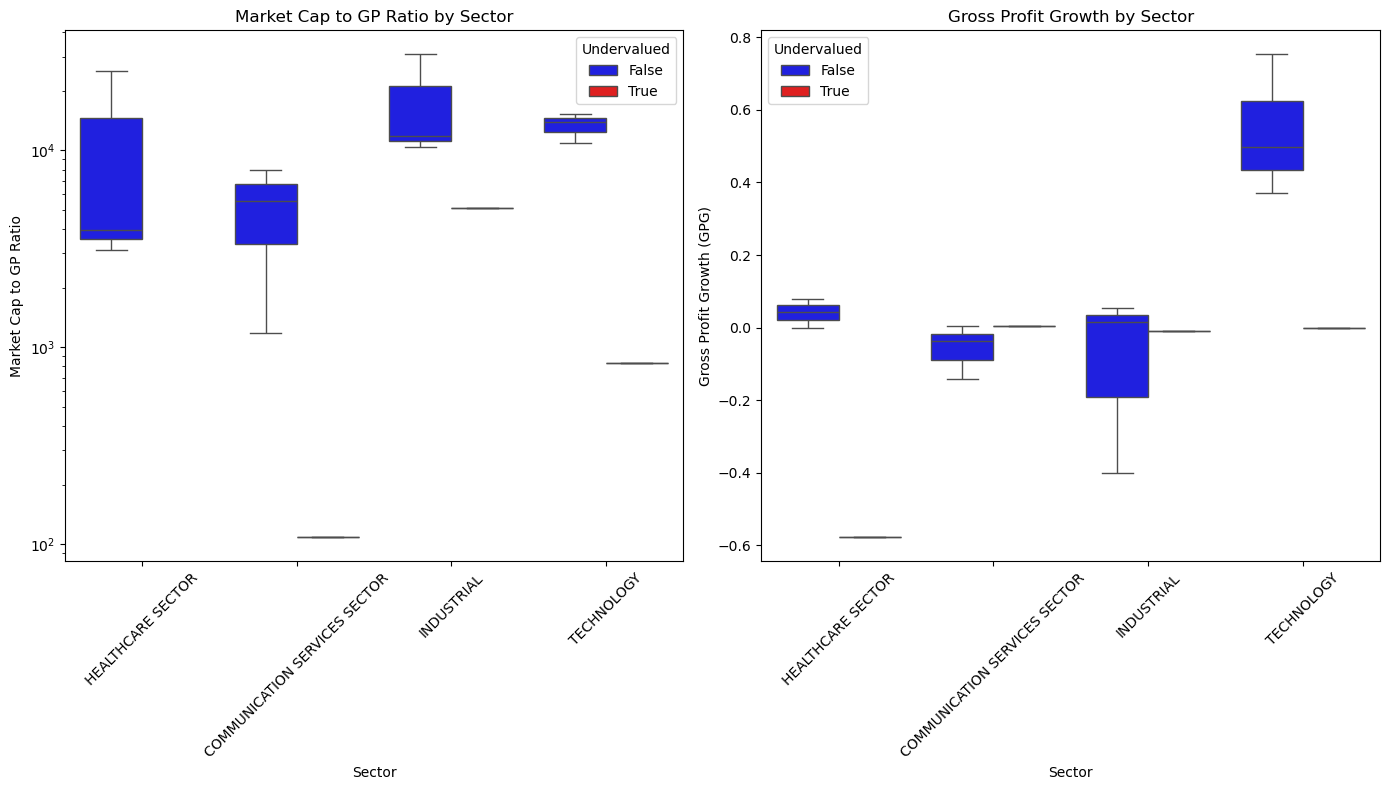

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated Excel file with undervalued data
file_path = 'finviz_update.xlsx'
df = pd.read_excel(file_path)

# Create visualizations
def plot_comparisons(df):
    plt.figure(figsize=(14, 8))
    
    # Plot Market Cap to GP Ratio by Sector
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='SECTOR', y='Market Cap to GP Ratio', hue='Undervalued', palette={True: 'red', False: 'blue'})
    plt.title('Market Cap to GP Ratio by Sector')
    plt.xticks(rotation=45)
    plt.yscale('log')  # Log scale for better visualization of large differences
    plt.xlabel('Sector')
    plt.ylabel('Market Cap to GP Ratio')
    
    # Plot Gross Profit Growth by Sector
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='SECTOR', y='Gross Profit Growth (GPG)', hue='Undervalued', palette={True: 'red', False: 'blue'})
    plt.title('Gross Profit Growth by Sector')
    plt.xticks(rotation=45)
    plt.xlabel('Sector')
    plt.ylabel('Gross Profit Growth (GPG)')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

# Plot the comparisons
plot_comparisons(df)


C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_df['Undervalued'] = sector_df['Undervalued'].astype(str)
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sector_df, x='Undervalued', y='Market Cap to GP Ratio', palette=palette)
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

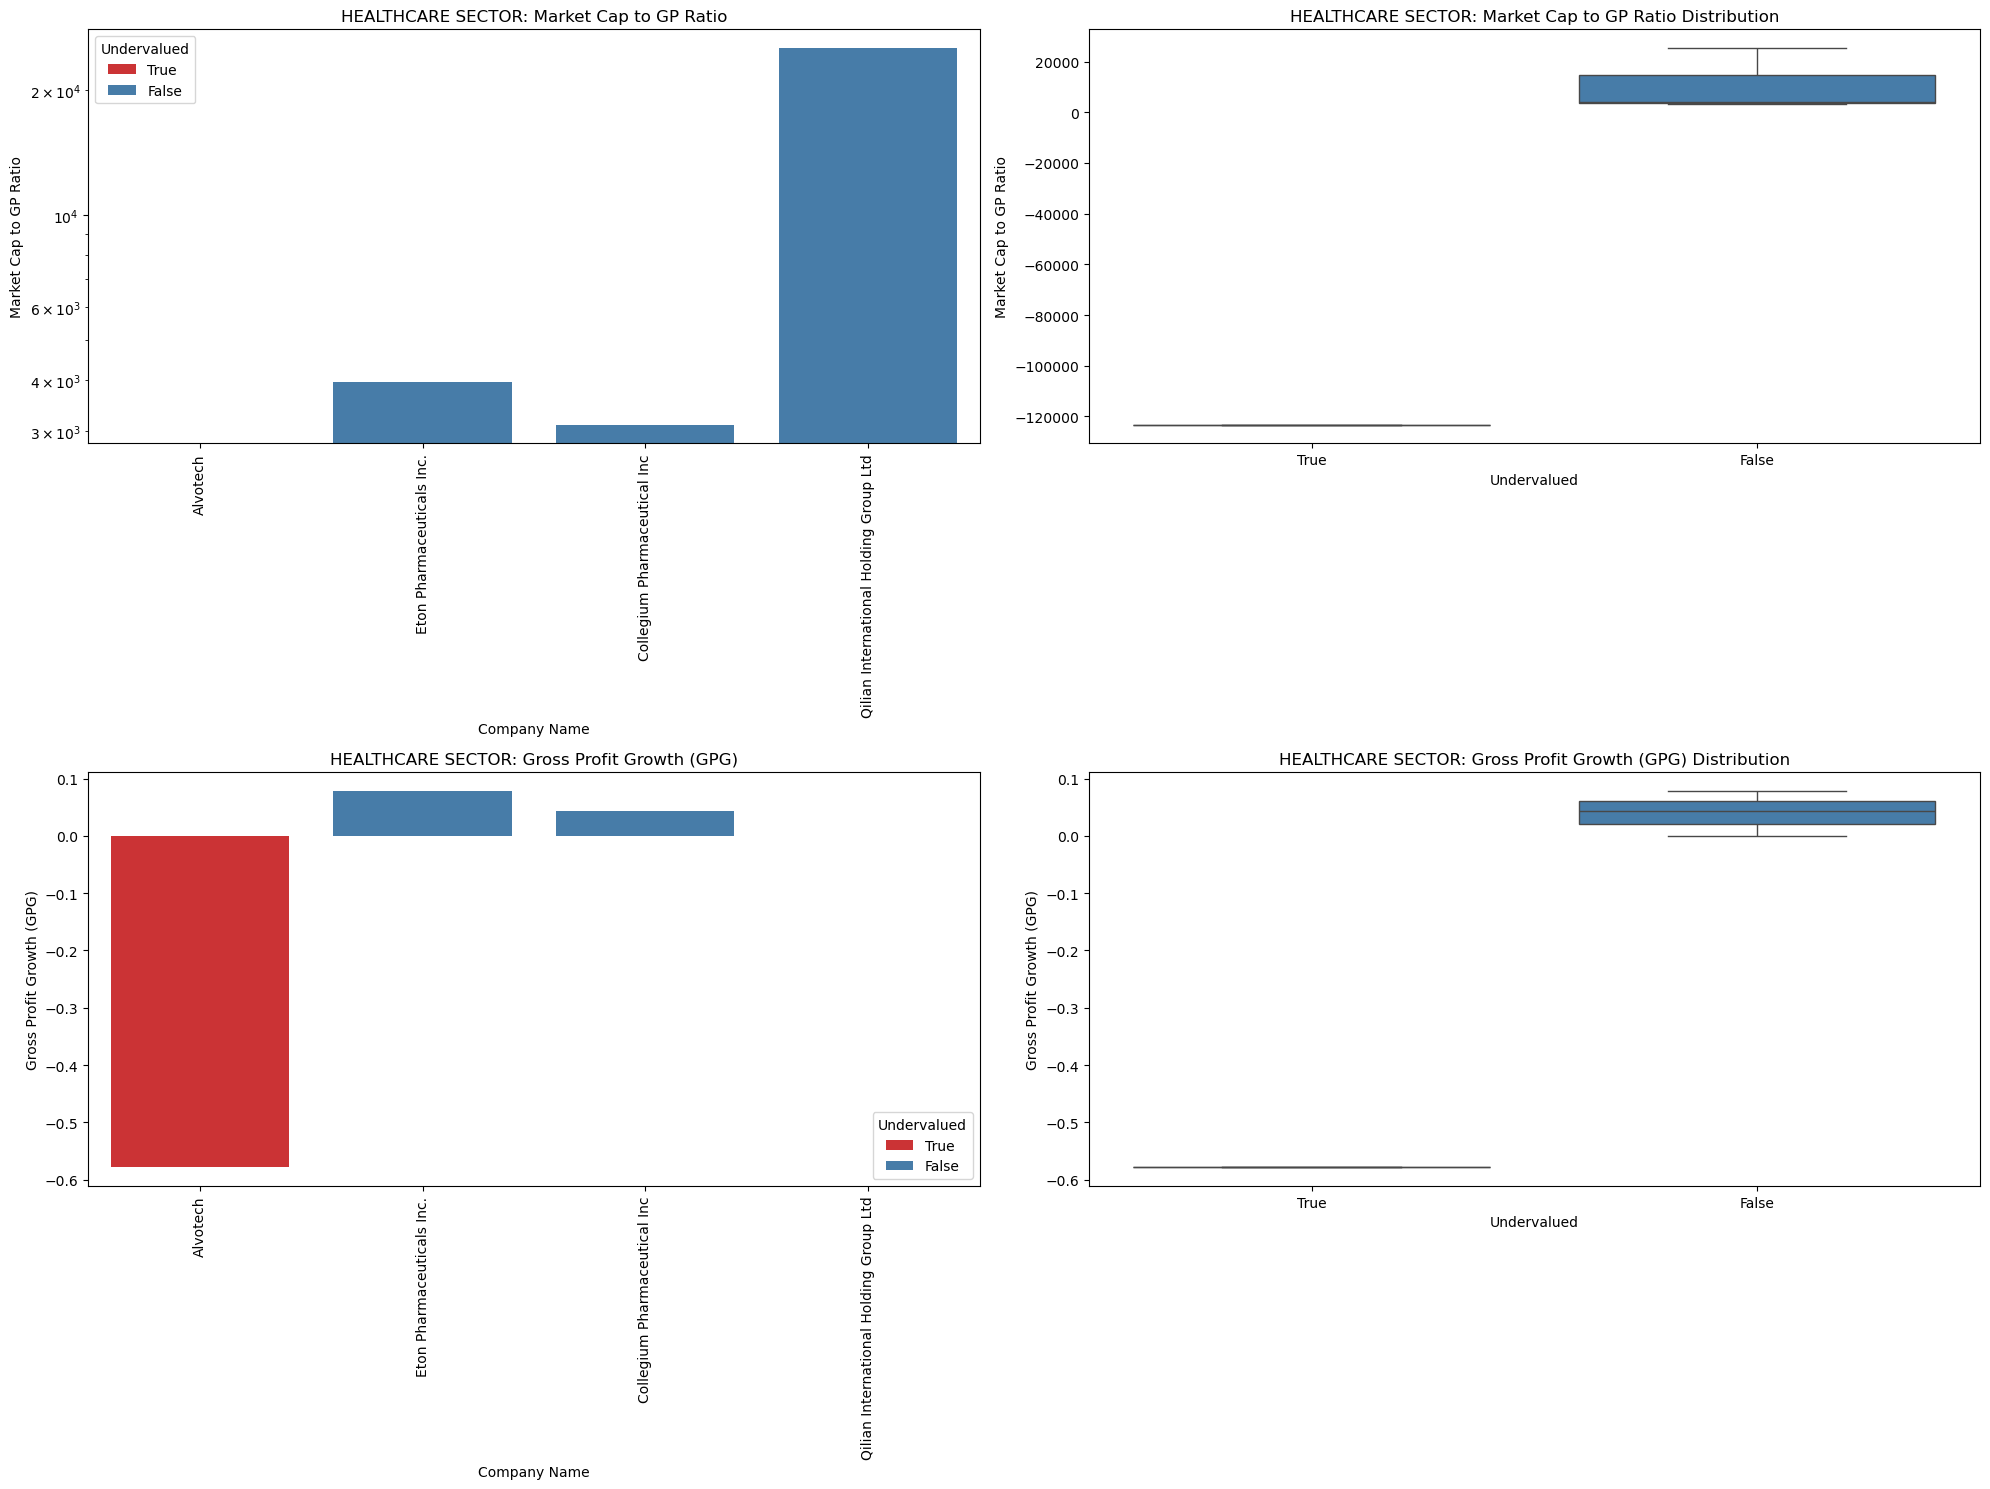

C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_df['Undervalued'] = sector_df['Undervalued'].astype(str)
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sector_df, x='Undervalued', y='Market Cap to GP Ratio', palette=palette)
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

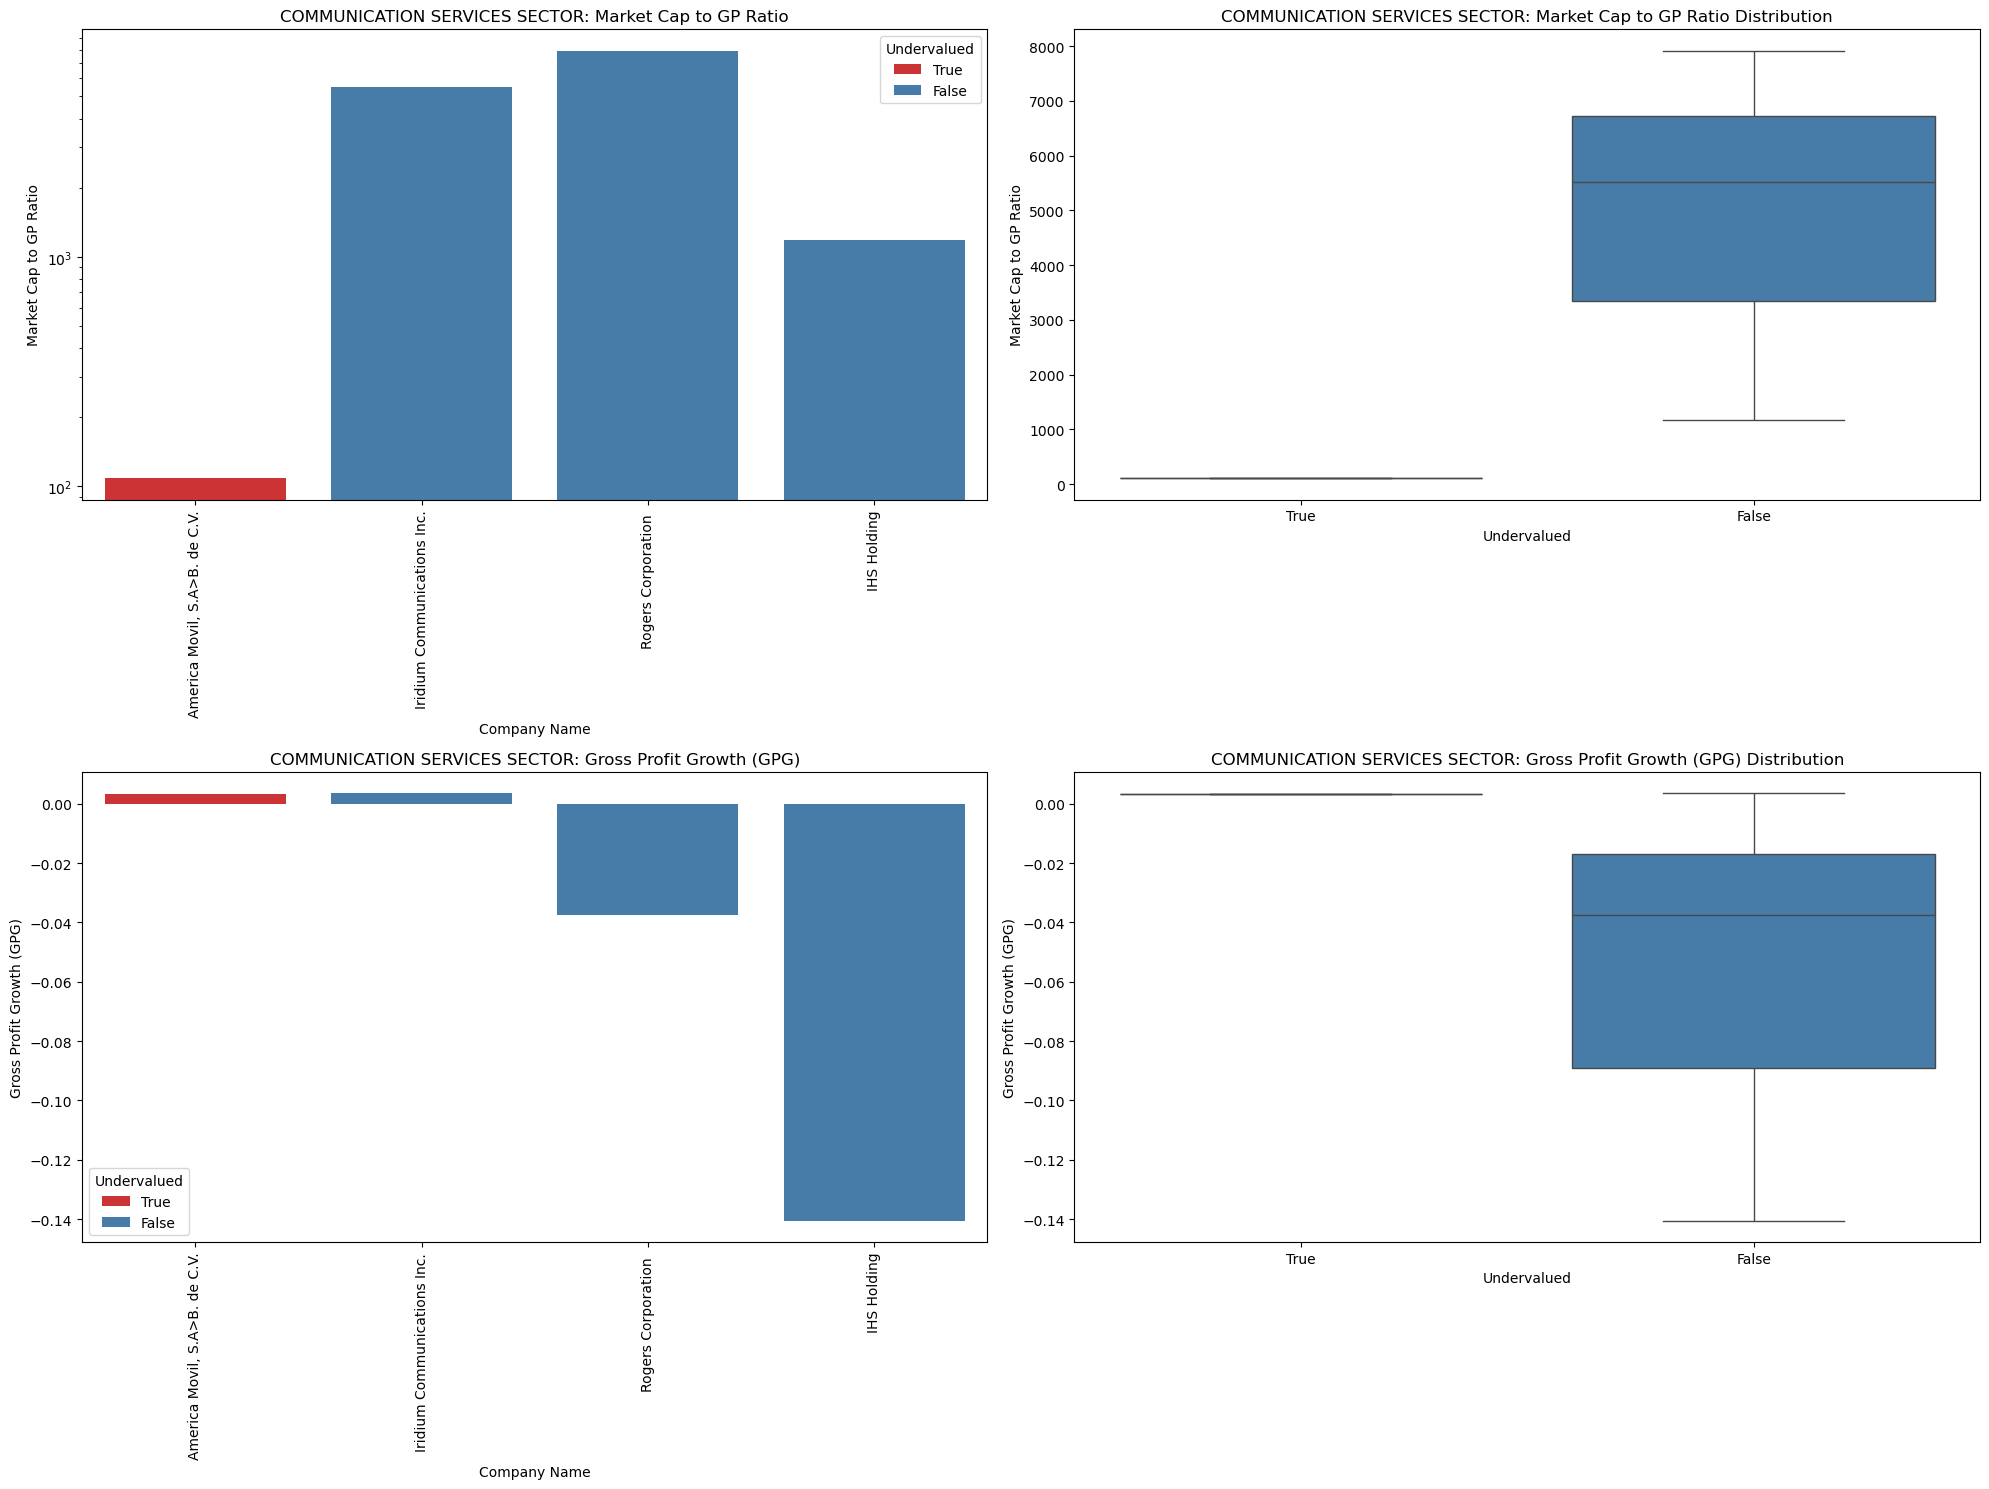

C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_df['Undervalued'] = sector_df['Undervalued'].astype(str)
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sector_df, x='Undervalued', y='Market Cap to GP Ratio', palette=palette)
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

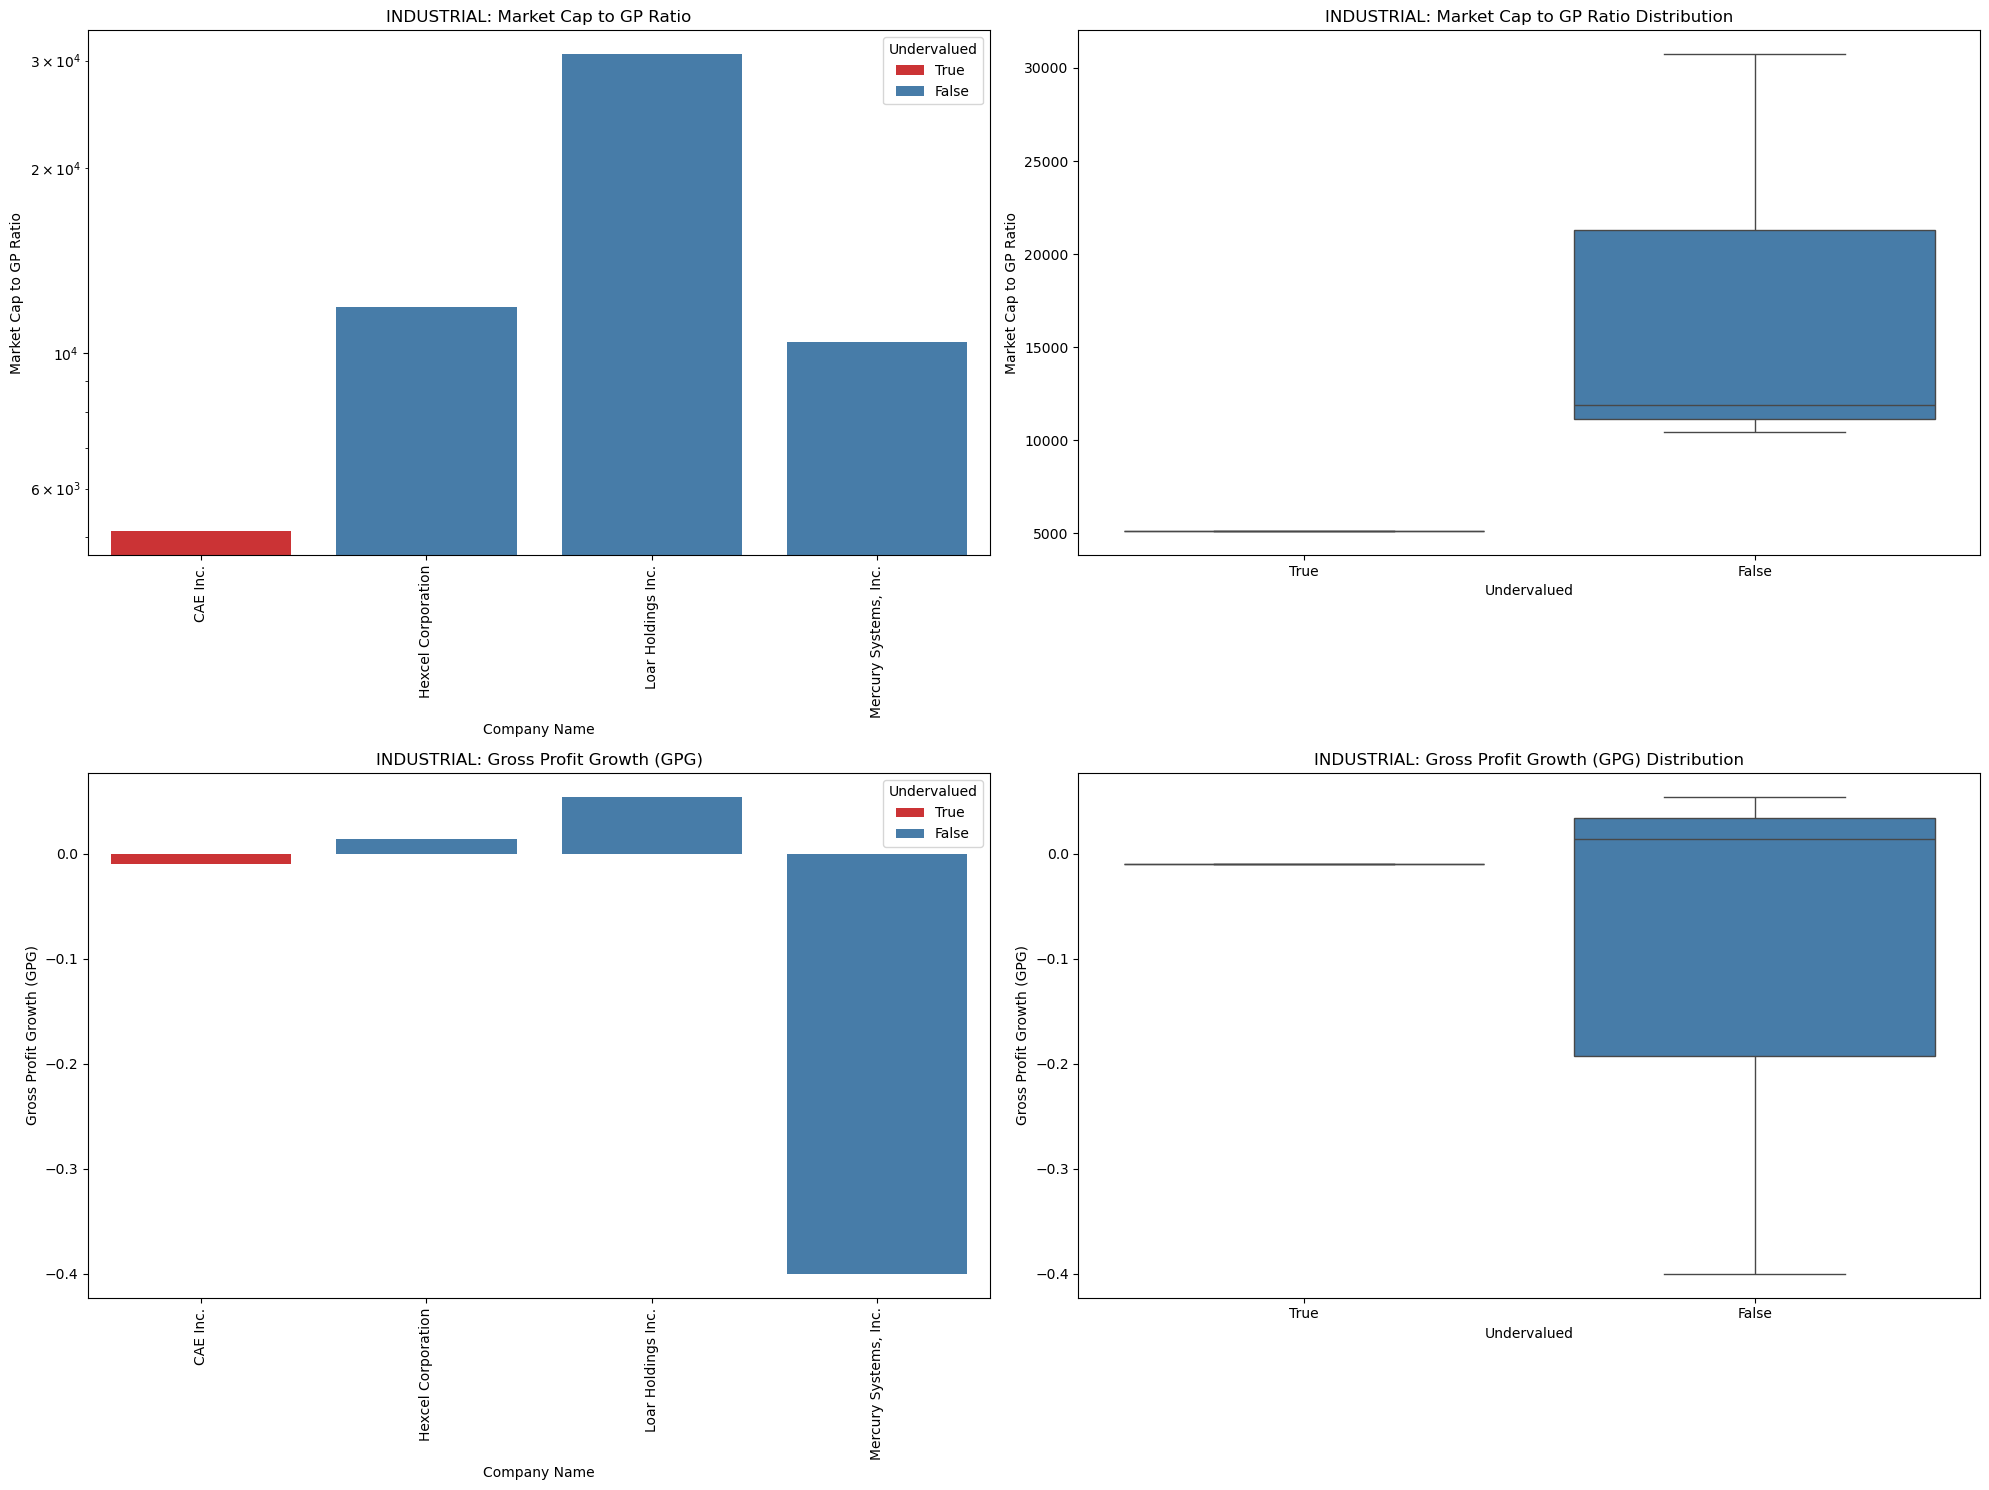

C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_df['Undervalued'] = sector_df['Undervalued'].astype(str)
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sector_df, x='Undervalued', y='Market Cap to GP Ratio', palette=palette)
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2555757176.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

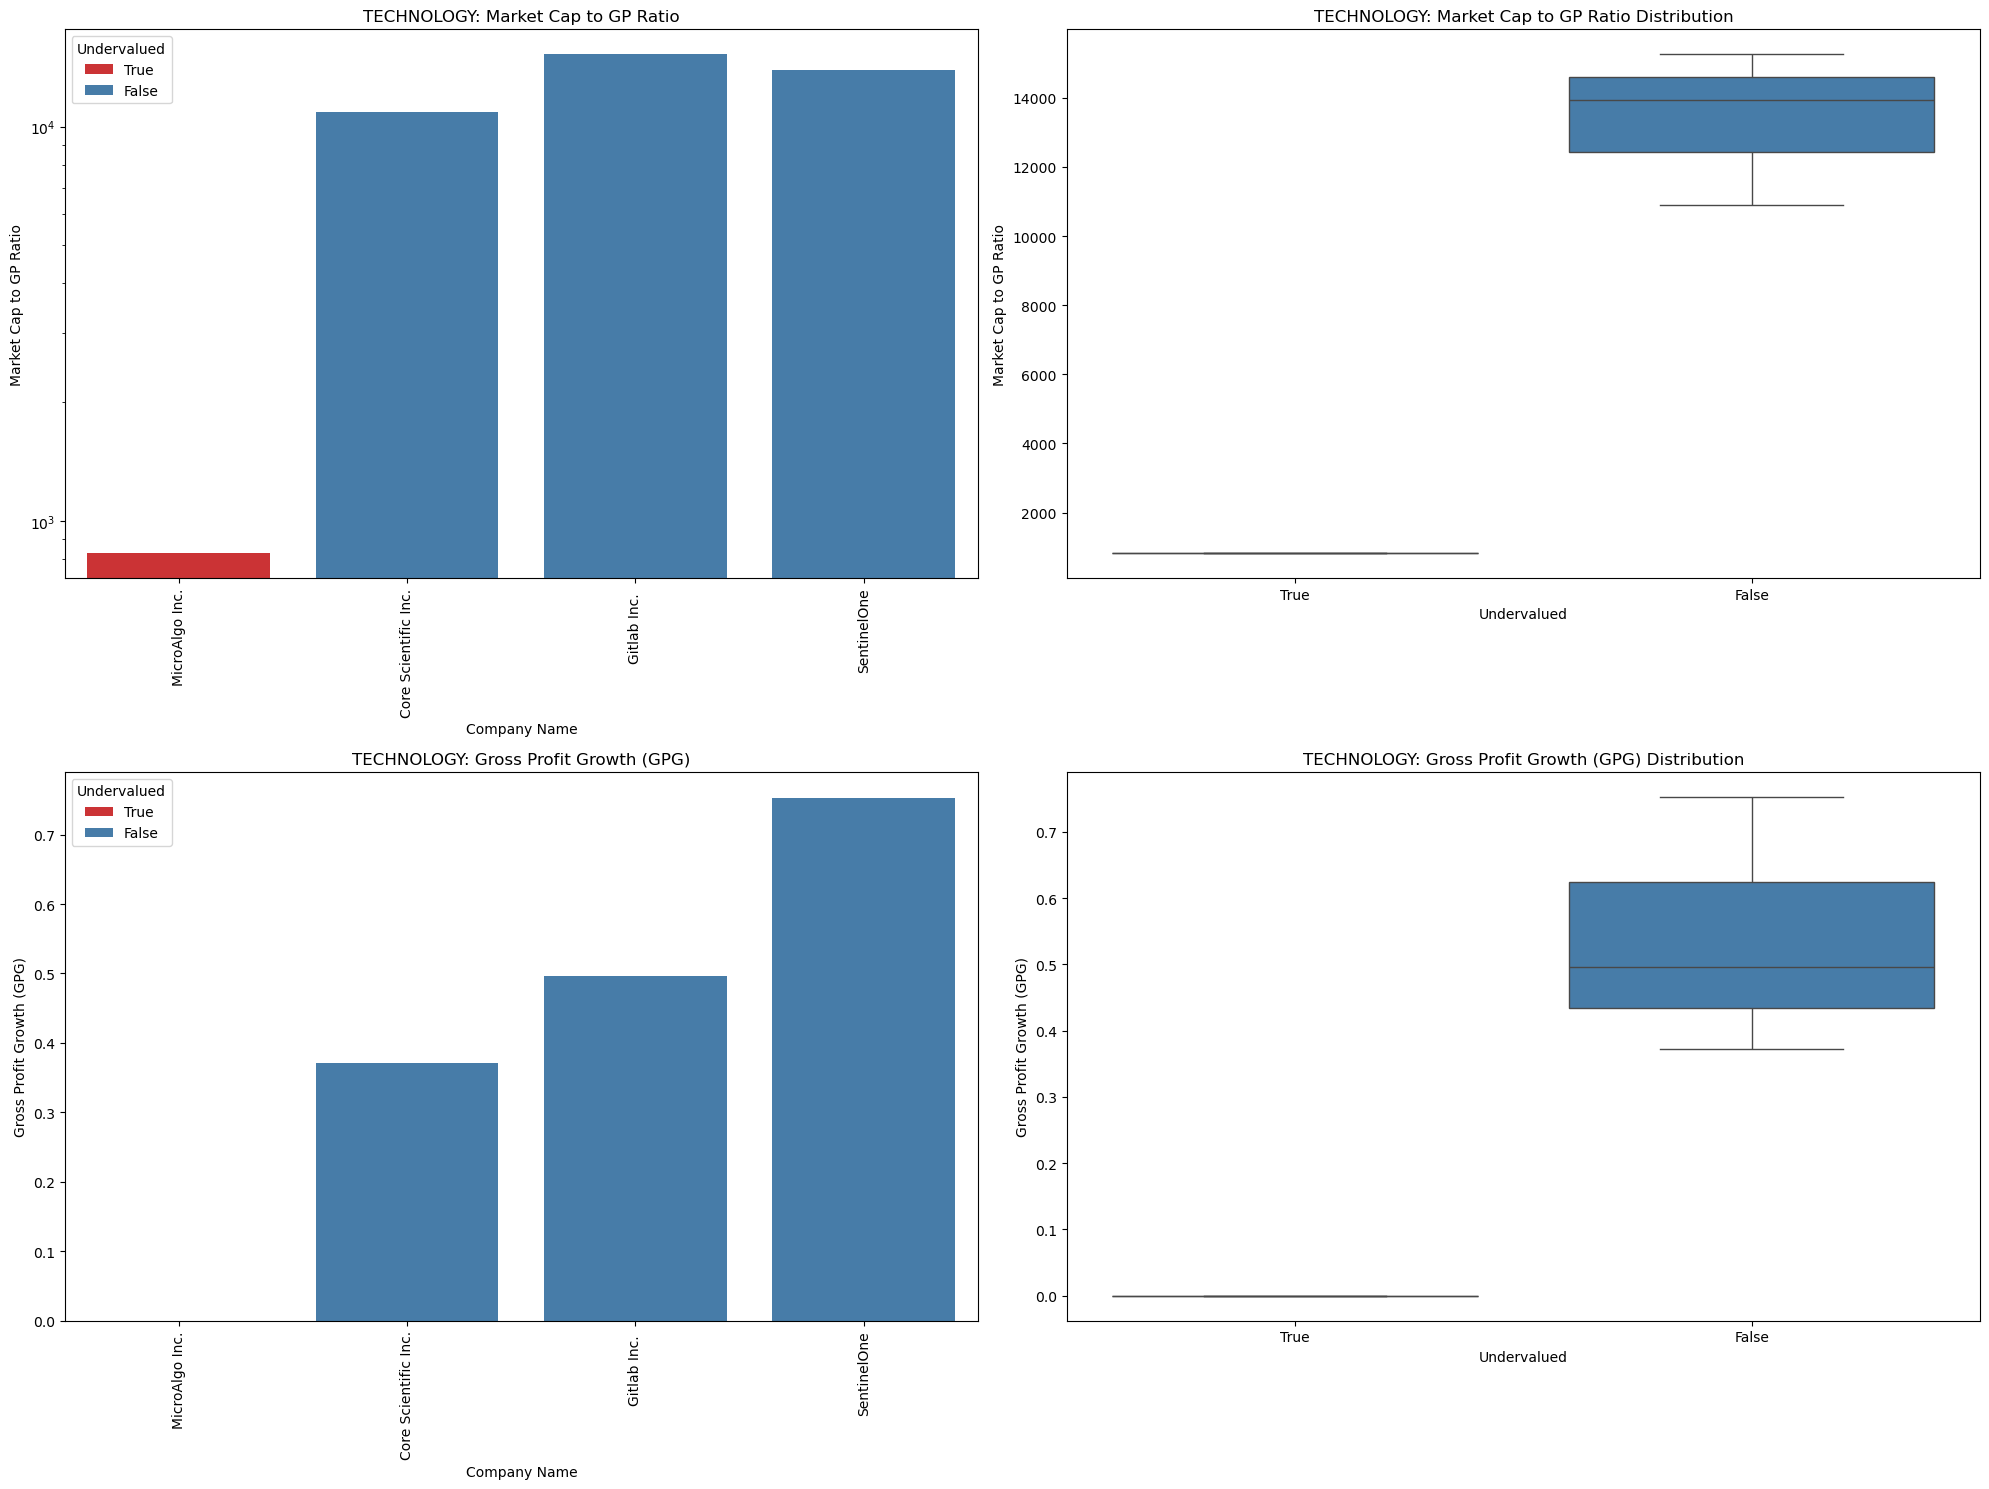

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated Excel file with undervalued data
file_path = 'finviz_update.xlsx'
df = pd.read_excel(file_path)

# Function to create and save plots for each sector
def plot_comparisons(df):
    # Get unique sectors
    sectors = df['SECTOR'].unique()
    
    for sector in sectors:
        plt.figure(figsize=(20, 15))
        sector_df = df[df['SECTOR'] == sector]
        
        # Ensure 'Undervalued' column is of type str to avoid palette issues
        sector_df['Undervalued'] = sector_df['Undervalued'].astype(str)
        
        # Define the palette based on unique values in the 'Undervalued' column
        unique_values = sector_df['Undervalued'].unique()
        palette = {val: color for val, color in zip(unique_values, sns.color_palette("Set1", len(unique_values)))}
        
        # Bar Plot of Market Cap to GP Ratio
        plt.subplot(2, 2, 1)
        sns.barplot(data=sector_df, x='Company Name', y='Market Cap to GP Ratio', hue='Undervalued', palette=palette)
        plt.title(f'{sector}: Market Cap to GP Ratio')
        plt.xticks(rotation=90)
        plt.yscale('log')  # Log scale to handle wide range of values
        plt.xlabel('Company Name')
        plt.ylabel('Market Cap to GP Ratio')
        
        # Box Plot of Market Cap to GP Ratio
        plt.subplot(2, 2, 2)
        sns.boxplot(data=sector_df, x='Undervalued', y='Market Cap to GP Ratio', palette=palette)
        plt.title(f'{sector}: Market Cap to GP Ratio Distribution')
        plt.xlabel('Undervalued')
        plt.ylabel('Market Cap to GP Ratio')

        # Bar Plot of Gross Profit Growth (GPG)
        plt.subplot(2, 2, 3)
        sns.barplot(data=sector_df, x='Company Name', y='Gross Profit Growth (GPG)', hue='Undervalued', palette=palette)
        plt.title(f'{sector}: Gross Profit Growth (GPG)')
        plt.xticks(rotation=90)
        plt.xlabel('Company Name')
        plt.ylabel('Gross Profit Growth (GPG)')
        
        # Box Plot of Gross Profit Growth (GPG)
        plt.subplot(2, 2, 4)
        sns.boxplot(data=sector_df, x='Undervalued', y='Gross Profit Growth (GPG)', palette=palette)
        plt.title(f'{sector}: Gross Profit Growth (GPG) Distribution')
        plt.xlabel('Undervalued')
        plt.ylabel('Gross Profit Growth (GPG)')
        
        # Save the plots for each sector
        plt.tight_layout()
        plt.savefig(f'{sector}_comparison_plots.png')
        plt.show()

# Generate and save plots
plot_comparisons(df)


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated Excel file with undervalued data
file_path = 'finviz_update.xlsx'
df = pd.read_excel(file_path)

# Function to create and save individual plots for each sector
def plot_comparisons(df):
    # Get unique sectors
    sectors = df['SECTOR'].unique()
    
    for sector in sectors:
        sector_df = df[df['SECTOR'] == sector]
        
        # Ensure 'Undervalued' column is of type str to avoid palette issues
        sector_df['Undervalued'] = sector_df['Undervalued'].astype(str)
        
        # Define the palette based on unique values in the 'Undervalued' column
        unique_values = sector_df['Undervalued'].unique()
        palette = {val: color for val, color in zip(unique_values, sns.color_palette("Set1", len(unique_values)))}
        
        # Bar Plot of Market Cap to GP Ratio
        plt.figure(figsize=(10, 6))
        sns.barplot(data=sector_df, x='Company Name', y='Market Cap to GP Ratio', hue='Undervalued', palette=palette)
        plt.title(f'{sector}: Market Cap to GP Ratio')
        plt.xticks(rotation=90)
        plt.yscale('log')  # Log scale to handle wide range of values
        plt.xlabel('Company Name')
        plt.ylabel('Market Cap to GP Ratio')
        plt.tight_layout()
        plt.savefig(f'{sector}_Market_Cap_to_GP_Ratio.png')
        plt.close()

        # Box Plot of Market Cap to GP Ratio
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=sector_df, x='Undervalued', y='Market Cap to GP Ratio', palette=palette)
        plt.title(f'{sector}: Market Cap to GP Ratio Distribution')
        plt.xlabel('Undervalued')
        plt.ylabel('Market Cap to GP Ratio')
        plt.tight_layout()
        plt.savefig(f'{sector}_Market_Cap_to_GP_Ratio_Distribution.png')
        plt.close()

        # Bar Plot of Gross Profit Growth (GPG)
        plt.figure(figsize=(10, 6))
        sns.barplot(data=sector_df, x='Company Name', y='Gross Profit Growth (GPG)', hue='Undervalued', palette=palette)
        plt.title(f'{sector}: Gross Profit Growth (GPG)')
        plt.xticks(rotation=90)
        plt.xlabel('Company Name')
        plt.ylabel('Gross Profit Growth (GPG)')
        plt.tight_layout()
        plt.savefig(f'{sector}_Gross_Profit_Growth.png')
        plt.close()

        # Box Plot of Gross Profit Growth (GPG)
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=sector_df, x='Undervalued', y='Gross Profit Growth (GPG)', palette=palette)
        plt.title(f'{sector}: Gross Profit Growth (GPG) Distribution')
        plt.xlabel('Undervalued')
        plt.ylabel('Gross Profit Growth (GPG)')
        plt.tight_layout()
        plt.savefig(f'{sector}_Gross_Profit_Growth_Distribution.png')
        plt.close()

# Generate and save plots
plot_comparisons(df)


C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\3147090593.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_df['Undervalued'] = sector_df['Undervalued'].astype(str)
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\3147090593.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sector_df, x='Undervalued', y='Market Cap to GP Ratio', palette=palette)
C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\3147090593.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated Excel file with the data
file_path = 'finviz_updated.xlsx'
df = pd.read_excel(file_path)

# Function to create and save visuals
def create_visuals(df):
    # Ensure proper handling of data types
    df['Gross Profit (GP)'] = pd.to_numeric(df['Gross Profit (GP)'], errors='coerce')
    df['2023 GP'] = pd.to_numeric(df['2023 GP'], errors='coerce')
    df['2022 GP'] = pd.to_numeric(df['2022 GP'], errors='coerce')
    df['2021 GP'] = pd.to_numeric(df['2021 GP'], errors='coerce')
    df['Projected Market Cap Year 1'] = pd.to_numeric(df['Projected Market Cap Year 1'], errors='coerce')
    df['Projected Market Cap Year 2'] = pd.to_numeric(df['Projected Market Cap Year 2'], errors='coerce')
    df['Projected Market Cap Year 3'] = pd.to_numeric(df['Projected Market Cap Year 3'], errors='coerce')
    df['Projected Market Cap Year 4'] = pd.to_numeric(df['Projected Market Cap Year 4'], errors='coerce')

    # Get unique sectors
    sectors = df['SECTOR'].unique()

    for sector in sectors:
        sector_df = df[df['SECTOR'] == sector]

        plt.figure(figsize=(14, 10))
        
        # Plot Gross Profit (GP) and Projected GP for 4 years
        for i, row in sector_df.iterrows():
            company = row['Company Name']
            gp_values = [row['Gross Profit (GP)'], row['2023 GP'], row['2022 GP'], row['2021 GP']]
            projected_gp_values = [row['Projected Market Cap Year 1'], row['Projected Market Cap Year 2'],
                                   row['Projected Market Cap Year 3'], row['Projected Market Cap Year 4']]
            
            plt.plot(['Current GP', '2023', '2022', '2021', 'Projected Year 1', 'Projected Year 2', 
                      'Projected Year 3', 'Projected Year 4'], 
                     gp_values + projected_gp_values, marker='o', label=company)
        
        plt.title(f'{sector}: Gross Profit and Projected Gross Profit for 4 Years')
        plt.xlabel('Year')
        plt.ylabel('Gross Profit')
        plt.xticks(rotation=45)
        plt.legend(loc='best', bbox_to_anchor=(1.05, 1), ncol=1)
        plt.tight_layout()
        plt.savefig(f'{sector}_Gross_Profit_and_Projected_GP.png')
        plt.close()

# Generate and save the plots
create_visuals(df)


C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2472445238.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Company Name', y='Market Cap to GP Ratio', palette='viridis')


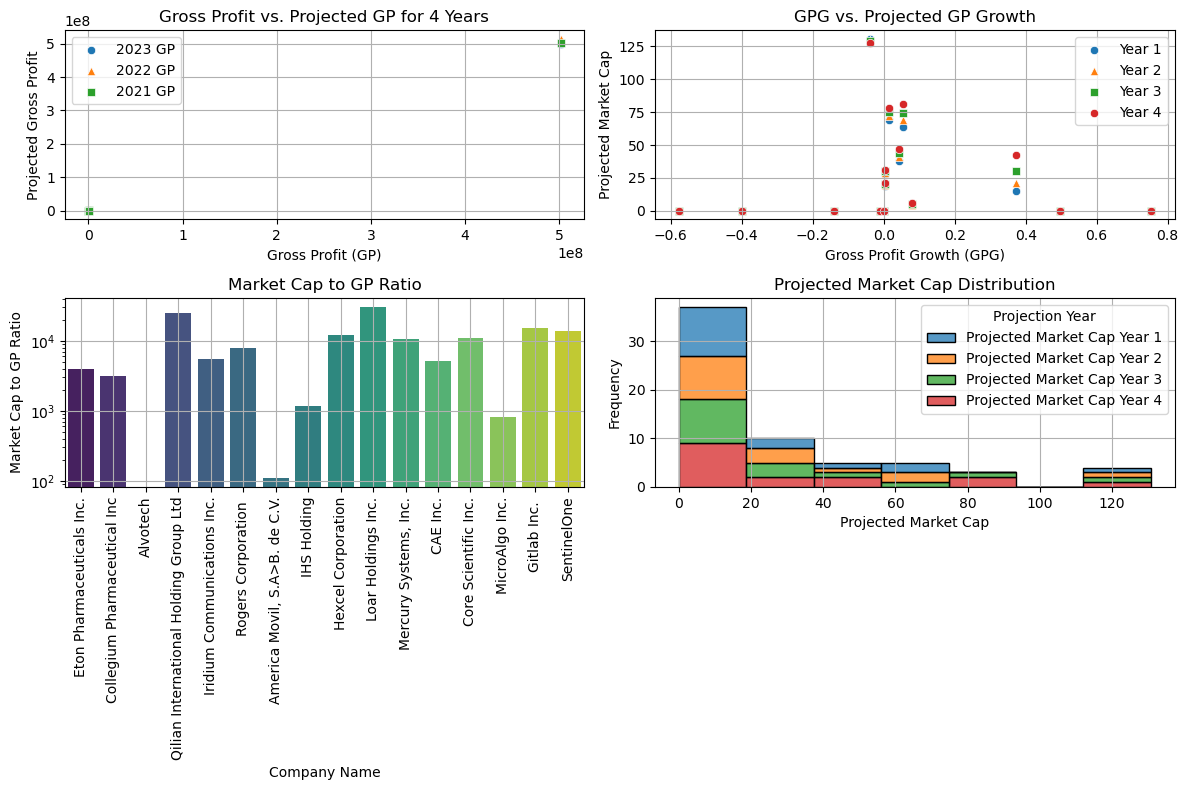

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = 'finviz_updated.xlsx'
df = pd.read_excel(file_path)

# Create a new folder for saving the plots
output_folder = 'visualizations'
os.makedirs(output_folder, exist_ok=True)

# Function to save visualizations
def save_visualizations(df):
    # 1. GP vs. Projected GP for 4 Years
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(data=df, x='Gross Profit (GP)', y='2023 GP', label='2023 GP')
    sns.scatterplot(data=df, x='Gross Profit (GP)', y='2022 GP', label='2022 GP', marker='^')
    sns.scatterplot(data=df, x='Gross Profit (GP)', y='2021 GP', label='2021 GP', marker='s')
    plt.title('Gross Profit vs. Projected GP for 4 Years')
    plt.xlabel('Gross Profit (GP)')
    plt.ylabel('Projected Gross Profit')
    plt.legend()
    plt.grid(True)

    # 2. GPG vs. Projected GP Growth
    plt.subplot(2, 2, 2)
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 1', label='Year 1')
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 2', label='Year 2', marker='^')
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 3', label='Year 3', marker='s')
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 4', label='Year 4', marker='o')
    plt.title('GPG vs. Projected GP Growth')
    plt.xlabel('Gross Profit Growth (GPG)')
    plt.ylabel('Projected Market Cap')
    plt.legend()
    plt.grid(True)

    # 3. Market Cap to GP Ratio
    df['Market Cap to GP Ratio'] = df['Market Cap'] / df['Gross Profit (GP)']
    plt.subplot(2, 2, 3)
    sns.barplot(data=df, x='Company Name', y='Market Cap to GP Ratio', palette='viridis')
    plt.title('Market Cap to GP Ratio')
    plt.xlabel('Company Name')
    plt.ylabel('Market Cap to GP Ratio')
    plt.xticks(rotation=90)
    plt.yscale('log')  # Log scale for better visibility
    plt.grid(True)

    # 4. Projected Market Cap Distribution
    projected_columns = ['Projected Market Cap Year 1', 'Projected Market Cap Year 2', 
                         'Projected Market Cap Year 3', 'Projected Market Cap Year 4']
    df_melted = df.melt(id_vars=['Company Name'], value_vars=projected_columns, 
                        var_name='Projection Year', value_name='Projected Market Cap')
    
    plt.subplot(2, 2, 4)
    sns.histplot(df_melted, x='Projected Market Cap', hue='Projection Year', multiple='stack', palette='tab10')
    plt.title('Projected Market Cap Distribution')
    plt.xlabel('Projected Market Cap')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Save plots to the new folder
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, 'visualizations.png'))
    plt.show()

# Generate and save the visualizations
save_visualizations(df)


Columns in the dataset: Index(['Company Name', 'SECTOR', 'Market Cap', 'P/E', 'EPS',
       'Gross Profit (GP)', '2023 GP', '2022 GP', '2021 GP',
       'Gross Profit Growth (GPG)', 'Projected Market Cap Year 1',
       'Projected Market Cap Year 2', 'Projected Market Cap Year 3',
       'Projected Market Cap Year 4'],
      dtype='object')


C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\2506239162.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Company Name', y='Market Cap to GP Ratio', palette='viridis')


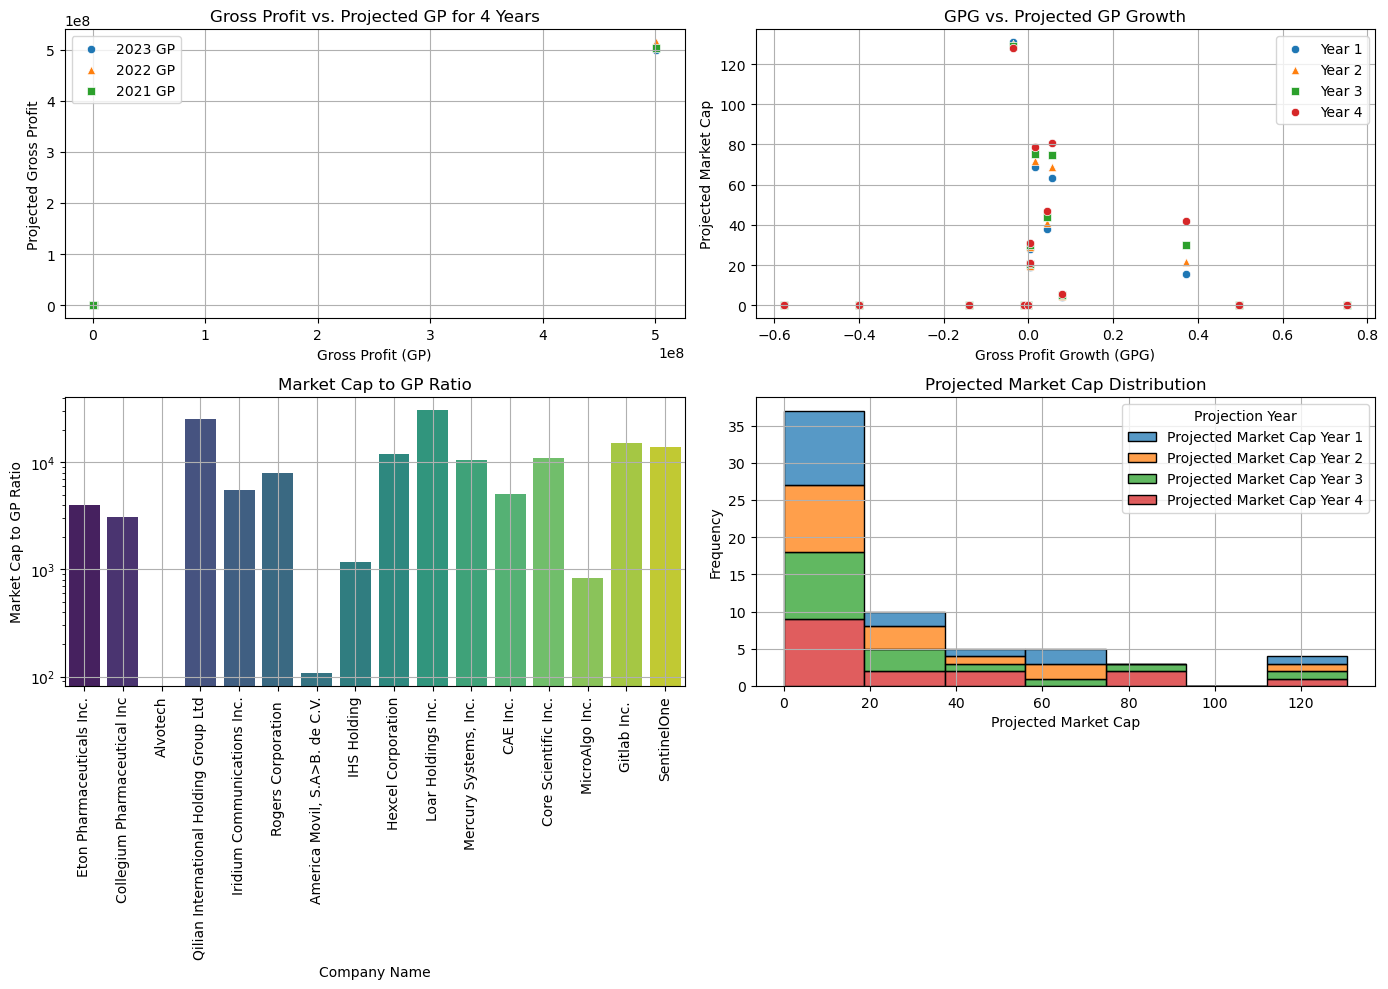

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = 'finviz_updated.xlsx'
df = pd.read_excel(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Print column names to debug
print("Columns in the dataset:", df.columns)

# Create a new folder for saving the plots
output_folder = 'visualizations'
os.makedirs(output_folder, exist_ok=True)

# Function to save visualizations
def save_visualizations(df):
    # 1. GP vs. Projected GP for 4 Years
    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    sns.scatterplot(data=df, x='Gross Profit (GP)', y='2023 GP', label='2023 GP')
    sns.scatterplot(data=df, x='Gross Profit (GP)', y='2022 GP', label='2022 GP', marker='^')
    sns.scatterplot(data=df, x='Gross Profit (GP)', y='2021 GP', label='2021 GP', marker='s')
    plt.title('Gross Profit vs. Projected GP for 4 Years')
    plt.xlabel('Gross Profit (GP)')
    plt.ylabel('Projected Gross Profit')
    plt.legend()
    plt.grid(True)

    # 2. GPG vs. Projected GP Growth
    plt.subplot(2, 2, 2)
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 1', label='Year 1')
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 2', label='Year 2', marker='^')
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 3', label='Year 3', marker='s')
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 4', label='Year 4', marker='o')
    plt.title('GPG vs. Projected GP Growth')
    plt.xlabel('Gross Profit Growth (GPG)')
    plt.ylabel('Projected Market Cap')
    plt.legend()
    plt.grid(True)

    # 3. Market Cap to GP Ratio
    df['Market Cap to GP Ratio'] = df['Market Cap'] / df['Gross Profit (GP)']
    plt.subplot(2, 2, 3)
    sns.barplot(data=df, x='Company Name', y='Market Cap to GP Ratio', palette='viridis')
    plt.title('Market Cap to GP Ratio')
    plt.xlabel('Company Name')
    plt.ylabel('Market Cap to GP Ratio')
    plt.xticks(rotation=90)
    plt.yscale('log')  # Log scale for better visibility
    plt.grid(True)

    # 4. Projected Market Cap Distribution
    projected_columns = ['Projected Market Cap Year 1', 'Projected Market Cap Year 2', 
                         'Projected Market Cap Year 3', 'Projected Market Cap Year 4']
    df_melted = df.melt(id_vars=['Company Name'], value_vars=projected_columns, 
                        var_name='Projection Year', value_name='Projected Market Cap')
    
    plt.subplot(2, 2, 4)
    sns.histplot(df_melted, x='Projected Market Cap', hue='Projection Year', multiple='stack', palette='tab10')
    plt.title('Projected Market Cap Distribution')
    plt.xlabel('Projected Market Cap')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Save plots to the new folder
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, 'visualizations.png'))
    plt.show()

# Generate and save the visualizations
save_visualizations(df)


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = 'finviz_updated.xlsx'
df = pd.read_excel(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Print column names to debug
print("Columns in the dataset:", df.columns)

# Create a new folder for saving the plots
output_folder = 'visualizations'
os.makedirs(output_folder, exist_ok=True)

# Function to save individual visualizations
def save_visualizations(df):
    # 1. GP vs. Projected GP for 4 Years
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='Gross Profit (GP)', y='2023 GP', label='2023 GP')
    sns.scatterplot(data=df, x='Gross Profit (GP)', y='2022 GP', label='2022 GP', marker='^')
    sns.scatterplot(data=df, x='Gross Profit (GP)', y='2021 GP', label='2021 GP', marker='s')
    plt.title('Gross Profit vs. Projected GP for 4 Years')
    plt.xlabel('Gross Profit (GP)')
    plt.ylabel('Projected Gross Profit')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, 'GP_vs_Projected_GP.png'))
    plt.close()

    # 2. GPG vs. Projected GP Growth
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 1', label='Year 1')
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 2', label='Year 2', marker='^')
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 3', label='Year 3', marker='s')
    sns.scatterplot(data=df, x='Gross Profit Growth (GPG)', y='Projected Market Cap Year 4', label='Year 4', marker='o')
    plt.title('GPG vs. Projected GP Growth')
    plt.xlabel('Gross Profit Growth (GPG)')
    plt.ylabel('Projected Market Cap')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, 'GPG_vs_Projected_GP_Growth.png'))
    plt.close()

    # 3. Market Cap to GP Ratio
    df['Market Cap to GP Ratio'] = df['Market Cap'] / df['Gross Profit (GP)']
    plt.figure(figsize=(12, 7))
    sns.barplot(data=df, x='Company Name', y='Market Cap to GP Ratio', palette='viridis')
    plt.title('Market Cap to GP Ratio')
    plt.xlabel('Company Name')
    plt.ylabel('Market Cap to GP Ratio')
    plt.xticks(rotation=90)
    plt.yscale('log')  # Log scale for better visibility
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, 'Market_Cap_to_GP_Ratio.png'))
    plt.close()

    # 4. Projected Market Cap Distribution
    projected_columns = ['Projected Market Cap Year 1', 'Projected Market Cap Year 2', 
                         'Projected Market Cap Year 3', 'Projected Market Cap Year 4']
    df_melted = df.melt(id_vars=['Company Name'], value_vars=projected_columns, 
                        var_name='Projection Year', value_name='Projected Market Cap')

    plt.figure(figsize=(12, 7))
    sns.histplot(df_melted, x='Projected Market Cap', hue='Projection Year', multiple='stack', palette='tab10')
    plt.title('Projected Market Cap Distribution')
    plt.xlabel('Projected Market Cap')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, 'Projected_Market_Cap_Distribution.png'))
    plt.close()

# Generate and save the visualizations
save_visualizations(df)


Columns in the dataset: Index(['Company Name', 'SECTOR', 'Market Cap', 'P/E', 'EPS',
       'Gross Profit (GP)', '2023 GP', '2022 GP', '2021 GP',
       'Gross Profit Growth (GPG)', 'Projected Market Cap Year 1',
       'Projected Market Cap Year 2', 'Projected Market Cap Year 3',
       'Projected Market Cap Year 4'],
      dtype='object')


C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_19672\3588737037.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Company Name', y='Market Cap to GP Ratio', palette='viridis')
